In [1]:
#import library
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#get file name
list_file = os.listdir('/content/drive/MyDrive/order')
list_file

['sales2019_12.csv',
 'sales2019_11.csv',
 'sales2019_10.csv',
 'sales2019_9.csv',
 'sales2019_8.csv',
 'sales2019_7.csv',
 'sales2019_6.csv',
 'sales2019_5.csv',
 'sales2019_4.csv',
 'sales2019_3.csv',
 'sales2019_2.csv',
 'sales2019_1.csv']

In [4]:
#read file
list_df = []
for filee in list_file:
  file_path = '/content/drive/MyDrive/order/'+filee
  list_df.append(pd.read_csv(file_path))

In [5]:
list_df[0].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [7]:
#sum example
sum_example = 0
for iter in list_df:
  sum_example += iter.shape[0]
print('number of example: ', sum_example)

number of example:  186850


In [8]:
#concat 12 months data
df = pd.concat(list_df).reset_index()
print('shape of data:', df.shape)
df.head()

shape of data: (186850, 7)


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             186850 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        186305 non-null  object
 5   Order Date        186305 non-null  object
 6   Purchase Address  186305 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.0+ MB


#Tháng nào bán chạy nhất và tháng đó bán được bao nhiêu

In [10]:
#delete noise
df = df[df['Price Each'] != 'Price Each']
df.dropna(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
#change type from string to number for Quantity Ordered and Price Each
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'].values)
df['Price Each'] = pd.to_numeric(df['Price Each'].values)

#create column Amount
df['Amount'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95


In [12]:
#change order of column Amount
df.insert(5,'Amount',df.pop('Amount'))
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Amount,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.00,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [13]:
#change type of Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'].values)
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Amount,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.00,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [14]:
#create columns Month
df['Month'] = df['Order Date'].dt.month
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Amount,Order Date,Purchase Address,Month
0,0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,1,295666,LG Washing Machine,1,600.00,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,2,295667,USB-C Charging Cable,1,11.95,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,3,295668,27in FHD Monitor,1,149.99,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,4,295669,USB-C Charging Cable,1,11.95,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


In [15]:
#
df.insert(6, 'Month', df.pop('Month'))
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Amount,Month,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.00,600.00,12,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,11.95,12,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,149.99,12,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,11.95,12,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [16]:
#revenue by month
reven_month = df.groupby('Month').sum().Amount
reven_month

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Amount, dtype: float64

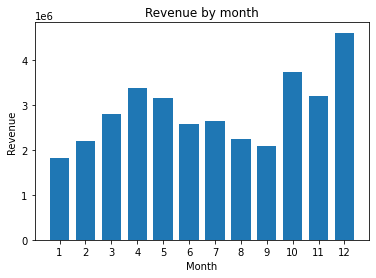

In [17]:
plt.bar(x = reven_month.index, height = reven_month.values, width = 0.75)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by month')
plt.xticks(reven_month.index)
plt.show()

- Tháng 12 bán được nhiều nhất do có nhiều ngày lễ hội như giáng sinh và đặc biệt là dịp cuối năm

#Thành phố nào bán chạy nhất?

In [18]:
get_city = lambda address:address.split(',')[1]

In [19]:
df['City'] = df['Purchase Address'].apply(get_city)
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Amount,Month,Order Date,Purchase Address,City
0,0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City
1,1,295666,LG Washing Machine,1,600.00,600.00,12,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City
2,2,295667,USB-C Charging Cable,1,11.95,11.95,12,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City
3,3,295668,27in FHD Monitor,1,149.99,149.99,12,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco
4,4,295669,USB-C Charging Cable,1,11.95,11.95,12,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta


In [20]:
reven_city = df.groupby('City').sum().Amount
reven_city

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Amount, dtype: float64

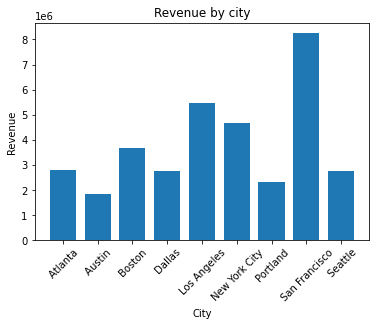

In [21]:
plt.bar(x = reven_city.index, height = reven_city.values, width = 0.75)
plt.xlabel('City')
plt.ylabel('Revenue')
plt.title('Revenue by city')
plt.xticks(rotation = 45)
plt.show()

- - San Franciso bán được nhiều nhất do ở đây có trụ sở của sollicon valley và có nhiều kĩ sư 

#Người mua vào giờ nào là nhiều

In [22]:
df['Time'] = df['Order Date'].dt.hour
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Amount,Month,Order Date,Purchase Address,City,Time
0,0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,0
1,1,295666,LG Washing Machine,1,600.00,600.00,12,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,11.95,12,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City,18
3,3,295668,27in FHD Monitor,1,149.99,149.99,12,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,11.95,12,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta,12


In [23]:
#count order by time
count_order_time = df.groupby('Time').count()['Order ID']
count_order_time

Time
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

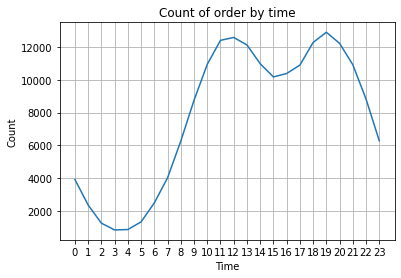

In [24]:
plt.plot(count_order_time.index, count_order_time.values)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count of order by time')
plt.xticks(count_order_time.index)
plt.grid()
plt.show()

- mọi người mua nhiều khi vào giờ nghỉ trưa hoặc khi đi làm về vào buôi tối

# những món hàng được bán nhiều cùng nhau?


In [25]:
#Products have same order id
df_duplicate = df[df['Order ID'].duplicated(keep = False)]
#sort product
df_duplicate.sort_values('Product',inplace= True)
df_duplicate.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,index,Order ID,Product,Quantity Ordered,Price Each,Amount,Month,Order Date,Purchase Address,City,Time
8132,8132,303421,20in Monitor,1,109.99,109.99,12,2019-12-10 20:36:00,"746 Walnut St, Seattle, WA 98101",Seattle,20
96138,9284,231790,20in Monitor,1,109.99,109.99,7,2019-07-27 12:55:00,"129 Meadow St, San Francisco, CA 94016",San Francisco,12
44413,1635,260909,20in Monitor,1,109.99,109.99,10,2019-10-07 21:43:00,"550 Jackson St, San Francisco, CA 94016",San Francisco,21
137319,5837,182136,20in Monitor,1,109.99,109.99,4,2019-04-10 11:40:00,"306 Cherry St, Boston, MA 02215",Boston,11
16963,16963,311878,20in Monitor,1,109.99,109.99,12,2019-12-12 12:34:00,"230 Hickory St, Austin, TX 73301",Austin,12


In [26]:
all_product = df_duplicate.groupby('Order ID').Product.apply(','.join)
all_product.head()


Order ID
141275             USB-C Charging Cable,Wired Headphones
141290    AA Batteries (4-pack),Apple Airpods Headphones
141365                  Vareebadd Phone,Wired Headphones
141384                 Google Phone,USB-C Charging Cable
141450           Bose SoundSport Headphones,Google Phone
Name: Product, dtype: object

In [27]:
#Top 10 products are sold together
from itertools import combinations
from collections import Counter
count = Counter()

for products in all_product:
  product_list = products.split(',')
  count.update(Counter(combinations(product_list,2)))
count.most_common(10)

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 368),
 (('Bose SoundSport Headphones', 'Google Phone'), 228),
 (('USB-C Charging Cable', 'Wired Headphones'), 205),
 (('Vareebadd Phone', 'Wired Headphones'), 149),
 (('Lightning Charging Cable', 'Wired Headphones'), 129)]

In [28]:
products_together = pd.DataFrame(count.most_common(10),columns = ['Product','Sum'])
products_together['Product'] = products_together['Product'].apply(lambda stri: stri[0]+', '+stri[1])
products_together

,Product,Sum
0,"Lightning Charging Cable, iPhone",1015
1,"Google Phone, USB-C Charging Cable",999
2,"Wired Headphones, iPhone",462
3,"Google Phone, Wired Headphones",423
4,"Apple Airpods Headphones, iPhone",373
5,"USB-C Charging Cable, Vareebadd Phone",368
6,"Bose SoundSport Headphones, Google Phone",228
7,"USB-C Charging Cable, Wired Headphones",205
8,"Vareebadd Phone, Wired Headphones",149
9,"Lightning Charging Cable, Wired Headphones",129


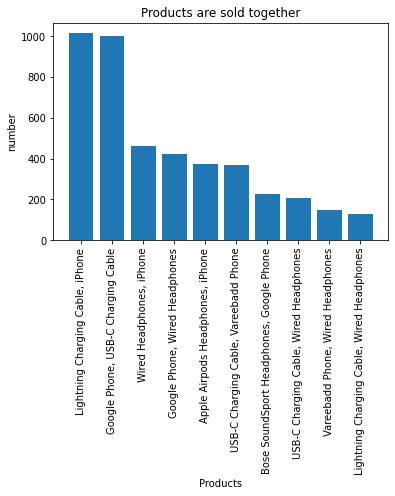

In [29]:
plt.bar(x = products_together.Product, height = products_together.Sum)
plt.xlabel('Products')
plt.ylabel('number')
plt.title('Products are sold together')
plt.xticks(rotation = 90)
plt.show()


- điện thoại, ổ cắm, tai nghe được mua chung với nhau nhiều bởi vậy ta nên bán chúng cùng nhau

# sản phẩm nào được mua nhiều nhất và tại sao

In [43]:
product_most = df.groupby('Product').sum()['Quantity Ordered']
product_most

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

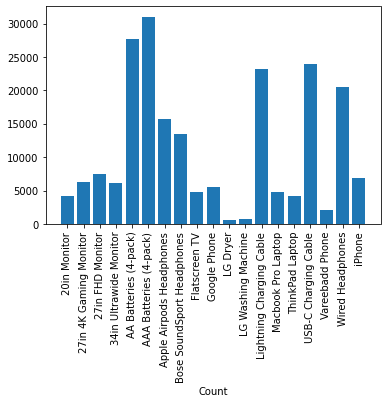

In [45]:
plt.bar(x = product_most.index, height = product_most.values)
plt.xlabel('Product')
plt.xlabel('Count')
plt.xticks(rotation = 90)
plt.show()

# Tại sao các món hàng AA Batteries, AA Batteries... lại bán chạy hơn các món đồ còn lại? 
- do giá
- do thương hiệu
- do chất lượng

In [47]:
product_cost = df.groupby('Product').mean()['Price Each']
product_cost 

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

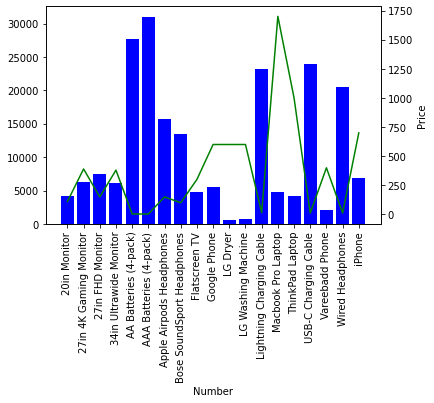

In [60]:
x = product_most.index
y1 = product_most.values
y2 = product_cost.values

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(x, y1, color = 'b')
ax2.plot(x, y2, 'g')
ax1.set_xticklabels(x,rotation = 90)
ax1.set_xlabel('Product')
ax1.set_xlabel('Number')
ax2.set_ylabel('Price')

plt.show()

- Những sản phẩm bán chạy nhất là những sản phẩm có giá thấp

# Macbook Pro laptop là mắc nhất vậy chúng được mua ở đâu nhiều nhất và ở đâu ít nhất.

In [68]:
# top 3 sản phẩm mắc nhất
macbook_sold = df[df['Product'] == 'Macbook Pro Laptop']
macbook_sold.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Amount,Month,Order Date,Purchase Address,City,Time
0,0,295665,Macbook Pro Laptop,1,1700.0,1700.0,12,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,0
52,52,295712,Macbook Pro Laptop,1,1700.0,1700.0,12,2019-12-10 20:02:00,"331 Madison St, New York City, NY 10001",New York City,20
57,57,295717,Macbook Pro Laptop,1,1700.0,1700.0,12,2019-12-25 09:51:00,"82 10th St, San Francisco, CA 94016",San Francisco,9
223,223,295871,Macbook Pro Laptop,1,1700.0,1700.0,12,2019-12-28 11:19:00,"661 Park St, Dallas, TX 75001",Dallas,11
304,304,295948,Macbook Pro Laptop,1,1700.0,1700.0,12,2019-12-17 21:08:00,"863 West St, San Francisco, CA 94016",San Francisco,21


In [70]:
city_macbook = macbook_sold.groupby('City').count()['Order ID']
city_macbook

City
 Atlanta           379
 Austin            251
 Boston            478
 Dallas            382
 Los Angeles       751
 New York City     656
 Portland          337
 San Francisco    1134
 Seattle           356
Name: Order ID, dtype: int64

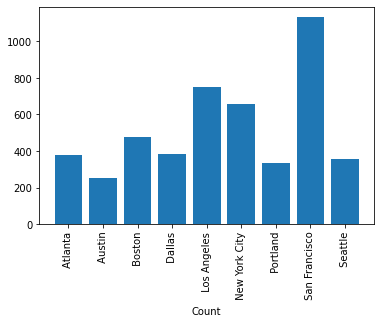

In [71]:
plt.bar(x = city_macbook.index, height = city_macbook.values)
plt.xlabel('Product')
plt.xlabel('Count')
plt.xticks(rotation = 90)
plt.show()